## 1. Crime Trends & Patterns
- How has the total number of crimes changed over the years?
- Which major crime indicator (MCI_CATEGORY) is most common?
- Is there seanonality to crime? Are certain months (OCC_MONTH) or days of the week (OCC_DOW) more dangerous?
- WHat time of day (OCC_HOUR) do most crimes occur?

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
color_palette = ['#fa5000', '#96c8c8', '#ffbe00', '#784b96', '#afbe5a', '#fa0000', '#fa78b4', '#005a5a']

In [2]:
policeData = pd.read_csv('Major_Crime_Indicators_Open_Data_-3805566126367379926.csv')
print(policeData.head())

   OBJECTID EVENT_UNIQUE_ID          REPORT_DATE             OCC_DATE  \
0         1  GO-20141261013  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
1         2  GO-20141261561  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
2         3  GO-20141262377  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
3         4  GO-20141262553  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   
4         5  GO-20141263115  1/1/2014 5:00:00 AM  1/1/2014 5:00:00 AM   

   REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  \
0         2014      January           1           1  Wednesday             4   
1         2014      January           1           1  Wednesday             8   
2         2014      January           1           1  Wednesday            12   
3         2014      January           1           1  Wednesday            14   
4         2014      January           1           1  Wednesday            16   

   ...              OFFENCE MCI_CATEGORY  HOOD_158  \
0  ...              Assaul

In [5]:
policeData.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [83]:
policeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452949 entries, 0 to 452948
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           452949 non-null  int64  
 1   EVENT_UNIQUE_ID    452949 non-null  object 
 2   REPORT_DATE        452949 non-null  object 
 3   OCC_DATE           452949 non-null  object 
 4   REPORT_YEAR        452949 non-null  int64  
 5   REPORT_MONTH       452949 non-null  object 
 6   REPORT_DAY         452949 non-null  int64  
 7   REPORT_DOY         452949 non-null  int64  
 8   REPORT_DOW         452949 non-null  object 
 9   REPORT_HOUR        452949 non-null  int64  
 10  OCC_YEAR           452798 non-null  float64
 11  OCC_MONTH          452798 non-null  object 
 12  OCC_DAY            452798 non-null  float64
 13  OCC_DOY            452798 non-null  float64
 14  OCC_DOW            452798 non-null  object 
 15  OCC_HOUR           452949 non-null  int64  
 16  DI

In [6]:
policeData.PREMISES_TYPE.value_counts()

PREMISES_TYPE
Outside        123398
Apartment      106167
Commercial      88822
House           81447
Other           27742
Transit         14216
Educational     11157
Name: count, dtype: int64

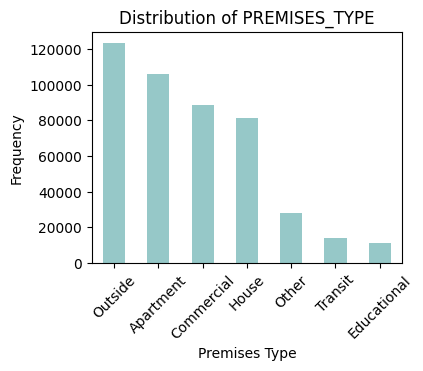

In [ ]:
# graph of PREMISES_TYPE
plt.figure(figsize=(4,3))
policeData.PREMISES_TYPE.value_counts().plot(kind='bar', color=color_palette[1])
plt.title('Distribution of PREMISES_TYPE')
plt.xlabel('Premises Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 1). Crime trends over time

#### Year

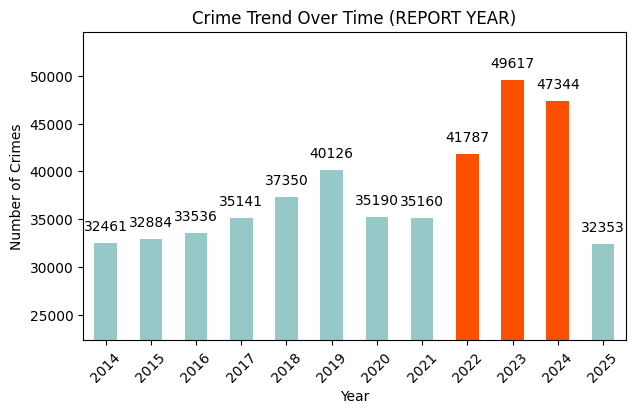

In [98]:
# crime trend over time (REPORT YEAR)
plt.figure(figsize=(7,4))
# use different color for top 3 years with highest crime rates
policeData.REPORT_YEAR.value_counts().sort_index().plot(kind='bar', color=[color_palette[0] if v in policeData.REPORT_YEAR.value_counts().nlargest(3).values else color_palette[1] for v in policeData.REPORT_YEAR.value_counts().sort_index()])
plt.title('Crime Trend Over Time (REPORT YEAR)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
# annotate bars with values
for i, v in enumerate(policeData.REPORT_YEAR.value_counts().sort_index()):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylim(policeData.REPORT_YEAR.value_counts().min() - 10000, policeData.REPORT_YEAR.value_counts().max() + 5000)
plt.show()

- lower crime rates in 2020 and 2021 potentially due to COVID
- crime rates jump back up in 2022, worse then previous years (2014-2019)

#### Month

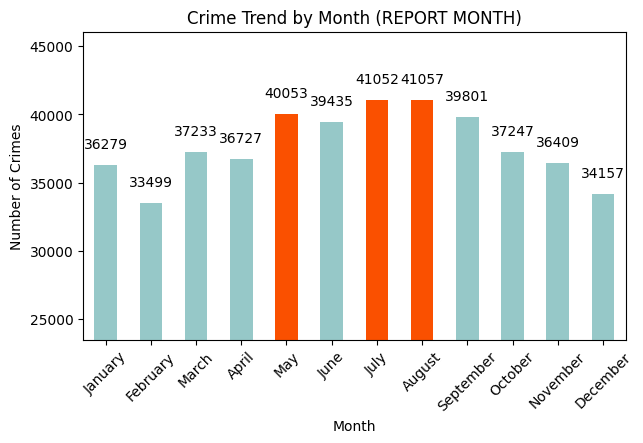

In [97]:
# crime trend REPORT_MONTH; fix month order
plt.figure(figsize=(7,4))

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the value counts to follow chronological order
month_counts = policeData.REPORT_MONTH.value_counts().reindex(month_order)
# use different color for top 3 months with highest crime rates
month_counts.plot(kind='bar', color=[color_palette[0] if v in month_counts.nlargest(3).values else color_palette[1] for v in month_counts])
plt.title('Crime Trend by Month (REPORT MONTH)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# annotate bars with values
for i, v in enumerate(month_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.ylim(month_counts.min() - 10000, month_counts.max() + 5000)
plt.show()

- higher crime rates in summer months

#### Day of the week

In [57]:
policeData.REPORT_DOW.value_counts()

REPORT_DOW
Monday        67113
Friday        66475
Tuesday       65620
Wednesday     65450
Thursday      64817
Saturday      62324
Sunday        61150
Name: count, dtype: int64

In [69]:
policeData.REPORT_DOW.unique()
# empty strings from REPORT_DOW are causing reindexing issues

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [70]:
# remove empty strings from REPORT_DOW
policeData.REPORT_DOW = policeData.REPORT_DOW.str.strip()
policeData.REPORT_DOW.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

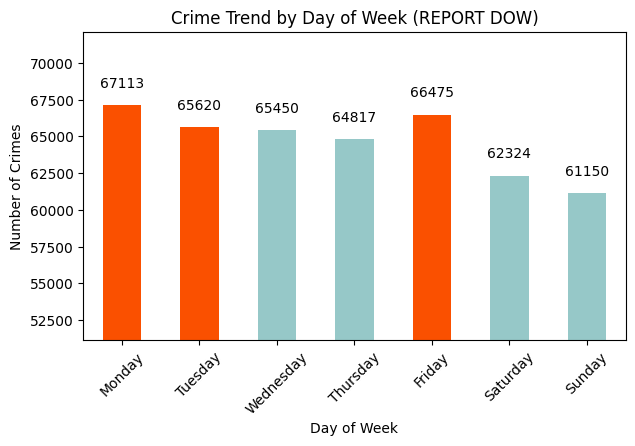

In [96]:
# crime pattern for REPORT_DOW
plt.figure(figsize=(7,4))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# reindex to ensure correct chronological order
dow_counts = policeData.REPORT_DOW.value_counts().reindex(weekday_order)
# use differenet color for top 3 days with highest crime rates
dow_counts.plot(kind='bar', color=[color_palette[0] if v in dow_counts.nlargest(3).values else color_palette[1] for v in dow_counts])
plt.title('Crime Trend by Day of Week (REPORT DOW)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')

# annotate bars with values
for i, v in enumerate(dow_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.ylim(dow_counts.min() - 10000, dow_counts.max() + 5000)
plt.show()

#### Hour

In [77]:
policeData.REPORT_HOUR.unique()

array([ 4,  8, 12, 14, 16, 18,  6, 21, 20,  7, 22,  1,  2,  0, 11, 15, 10,
        9,  3, 17,  5, 19, 23, 13])

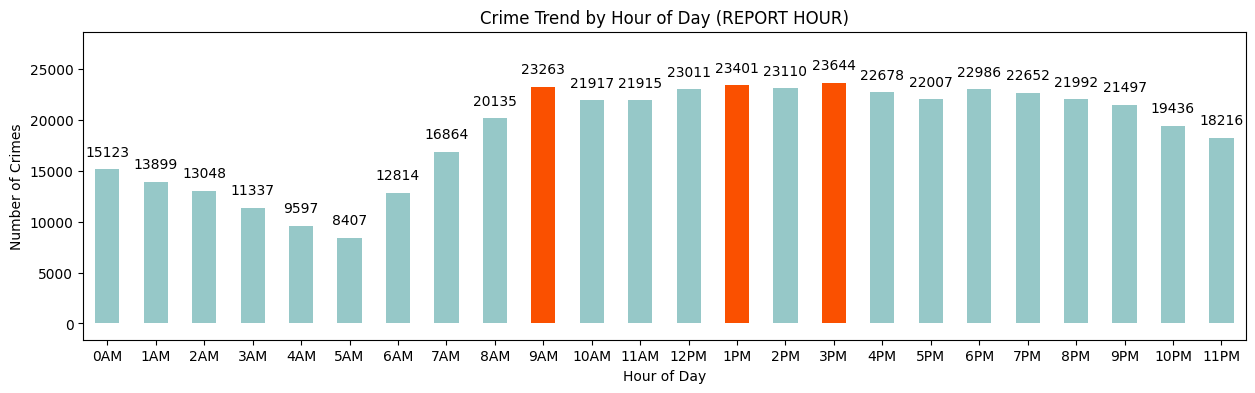

In [99]:
# crime rate by REPORT_HOUR
plt.figure(figsize=(15,4))
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# reindex to ensure correct chronological order
hour_counts = policeData.REPORT_HOUR.value_counts().reindex(hour_order)
# for counts > 23000, use color_palette[0]
hour_counts.plot(kind='bar', color=[color_palette[0] if v in hour_counts.nlargest(3).values else color_palette[1] for v in hour_counts])
plt.title('Crime Trend by Hour of Day (REPORT HOUR)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
# annotate bars with values
for i, v in enumerate(hour_counts):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
# x-axis label as 0AM, 1AM, ..., 11PM
plt.xticks(ticks=range(24), labels=[f'{h}AM' if h < 12 else (f'{h-12}PM' if h > 12 else '12PM') for h in range(24)])
plt.xticks(rotation=0)
plt.ylim(hour_counts.min() - 10000, hour_counts.max() + 5000)
plt.show()

### 2) Major Crime Indicator

In [105]:
policeData.MCI_CATEGORY.value_counts()

MCI_CATEGORY
Assault            242671
Break and Enter     81551
Auto Theft          73739
Robbery             39117
Theft Over          15871
Name: count, dtype: int64

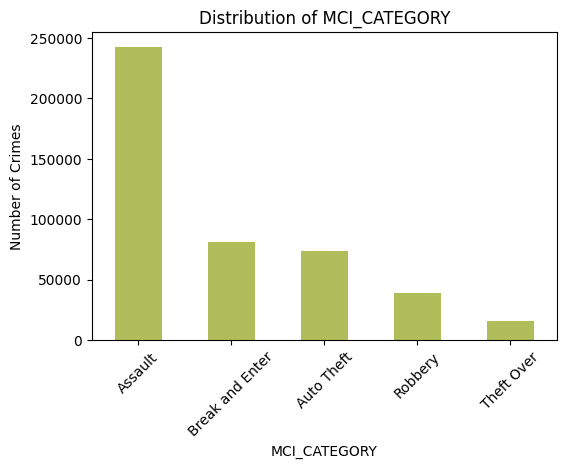

In [109]:
# MCI_CATEGORY distribution
plt.figure(figsize=(6,4))
policeData.MCI_CATEGORY.value_counts().plot(kind='bar', color=color_palette[4])
plt.title('Distribution of MCI_CATEGORY')
plt.xlabel('MCI_CATEGORY')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

C:\Users\yiyiw\AppData\Local\Temp\ipykernel_14168\95259942.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=policeData, x='REPORT_HOUR', hue='MCI_CATEGORY', palette=color_palette)


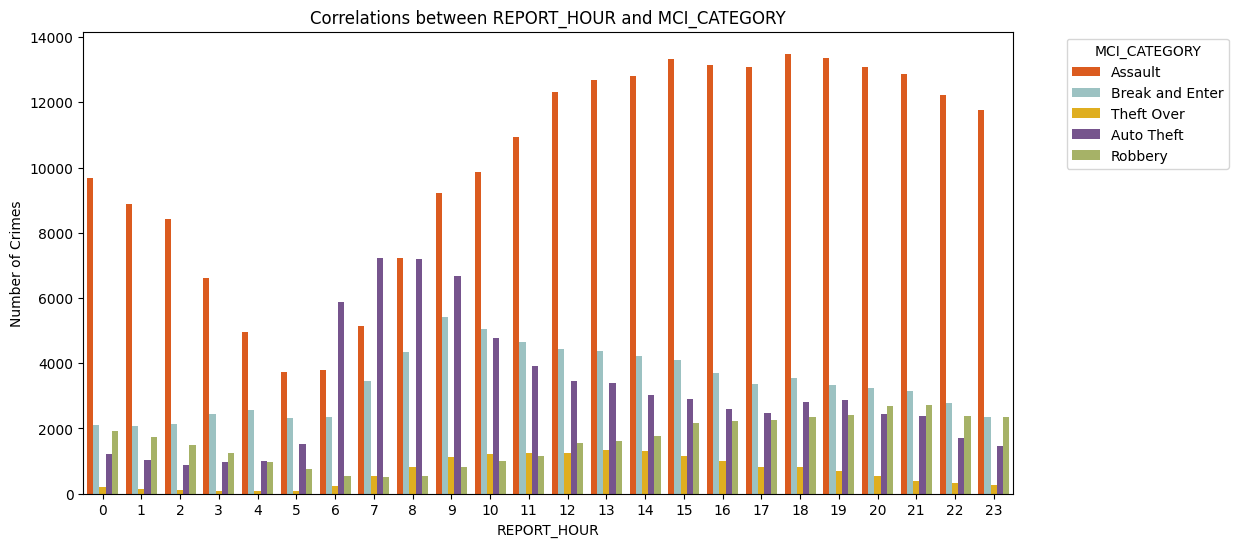

In [112]:
# explore corralations between REPORT_HOUR and MCI_CATEGORY
plt.figure(figsize=(12,6))
sns.countplot(data=policeData, x='REPORT_HOUR', hue='MCI_CATEGORY', palette=color_palette)
plt.title('Correlations between REPORT_HOUR and MCI_CATEGORY')
plt.xlabel('REPORT_HOUR')
plt.ylabel('Number of Crimes')
plt.legend(title='MCI_CATEGORY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\yiyiw\AppData\Local\Temp\ipykernel_14168\2605032467.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=policeData, x='REPORT_DOW', hue='MCI_CATEGORY', palette=color_palette)


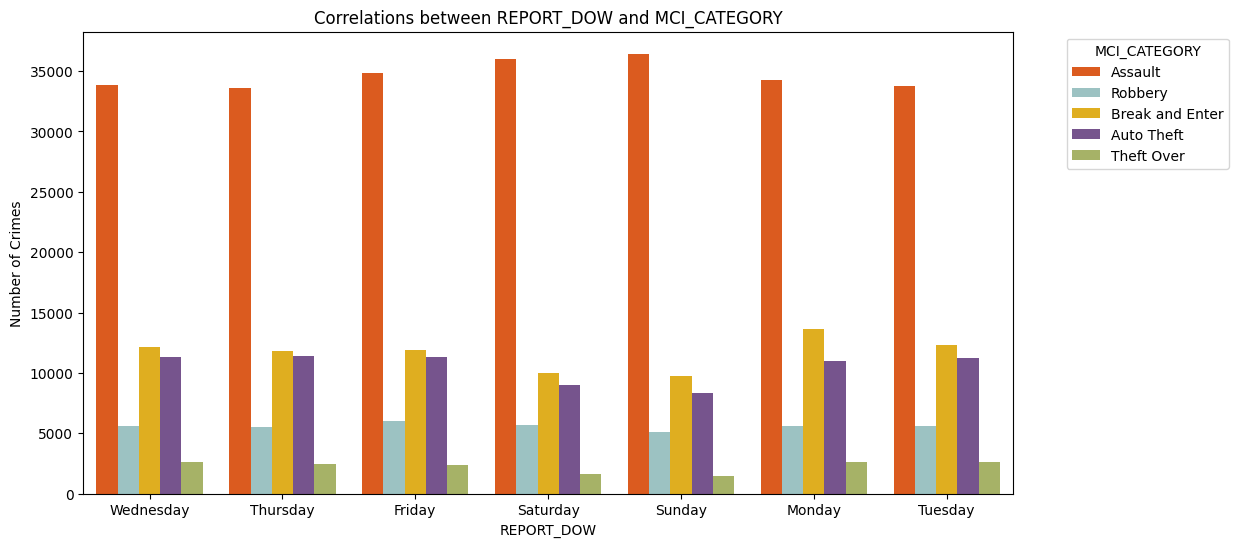

In [113]:
# explore correlations between REPORT_DOW and MCI_CATEGORY
plt.figure(figsize=(12,6))
sns.countplot(data=policeData, x='REPORT_DOW', hue='MCI_CATEGORY', palette=color_palette)
plt.title('Correlations between REPORT_DOW and MCI_CATEGORY')
plt.xlabel('REPORT_DOW')
plt.ylabel('Number of Crimes')
plt.legend(title='MCI_CATEGORY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
